In [1]:
from models.new_pipeline import improved_pipeline

In [2]:
datapath = ['epochs/epochs/epochs_S01.mat',
            'epochs/epochs/epochs_S02.mat',
            'epochs/epochs/epochs_S03.mat',
            'epochs/epochs/epochs_S04.mat',
            'epochs/epochs/epochs_S05.mat',
            'epochs/epochs/epochs_S06.mat',
            'epochs/epochs/epochs_S07.mat',
            'epochs/epochs/epochs_S08.mat'
           ]

Загрузка данных субъекта 1: epochs/epochs/epochs_S01.mat
Загрузка данных субъекта 2: epochs/epochs/epochs_S02.mat
Загрузка данных субъекта 3: epochs/epochs/epochs_S03.mat
Загрузка данных субъекта 4: epochs/epochs/epochs_S04.mat
Загрузка данных субъекта 5: epochs/epochs/epochs_S05.mat
Загрузка данных субъекта 6: epochs/epochs/epochs_S06.mat
Загрузка данных субъекта 7: epochs/epochs/epochs_S07.mat
Загрузка данных субъекта 8: epochs/epochs/epochs_S08.mat
Статистики нормализации: mean=0.0030, std=14.2926
Анализ временного окна...


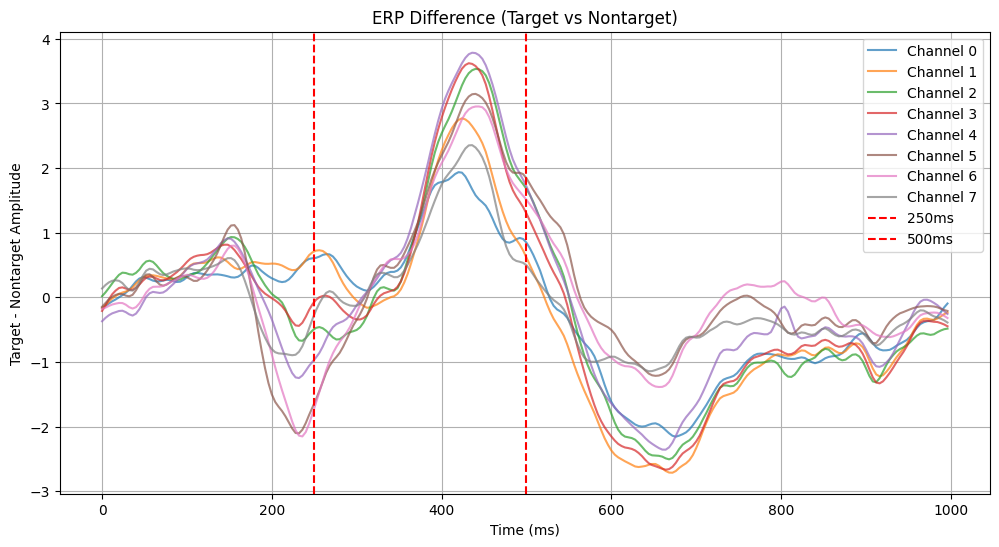

Оптимальное окно: 62-125
(23503, 8, 250)
(5876, 8, 250)
(4200, 8, 250)
Найдены классы в тренировочных данных: [0 1]
Длина последовательности после обрезки: 63
Начало обучения...
Найдены классы в тренировочных данных: [0 1]
Вычисленные веса классов: tensor([0.5999, 3.0017], device='cuda:0')

Epoch 1/100
Train Loss: 0.5459 | Val Loss: 0.5181
Val Acc: 0.5957
Target F1: 0.3294 | Precision: 0.2254 | Recall: 0.6118
ROC AUC: 0.5957 | Specificity: 0.5795
LR: 1.22e-03 | Grad Norm: 0.6323
Best F1: 0.3294
------------------------------------------------------------

Epoch 2/100
Train Loss: 0.5188 | Val Loss: 0.5104
Val Acc: 0.6179
Target F1: 0.3511 | Precision: 0.2500 | Recall: 0.5894
ROC AUC: 0.6179 | Specificity: 0.6465
LR: 1.86e-03 | Grad Norm: 0.3413
Best F1: 0.3511
------------------------------------------------------------

Epoch 3/100
Train Loss: 0.5136 | Val Loss: 0.5034
Val Acc: 0.6294
Target F1: 0.3627 | Precision: 0.2595 | Recall: 0.6027
ROC AUC: 0.6294 | Specificity: 0.6561
LR: 2.86e

In [3]:
model, history, accuracy = improved_pipeline(datapath, test_subject=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

def plot_comprehensive_training_analysis(history, test_predictions=None, test_labels=None, model_name="EEGNet"):
    """Комплексный анализ процесса обучения"""
    
    epochs = history["epoch"]
    
    # Создаем сетку графиков
    fig = plt.figure(figsize=(20, 16))
    
    # 1. ГРАФИК ПОТЕРЬ И ТОЧНОСТИ
    plt.subplot(3, 4, 1)
    plt.plot(epochs, history["train_loss"], label="Train Loss", color="blue", linewidth=2)
    plt.plot(epochs, history["val_loss"], label="Val Loss", color="red", linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Добавляем точку лучшей модели
    if "best_epoch" in history:
        best_epoch = history["best_epoch"]
        best_val_loss = history["val_loss"][best_epoch]
        plt.scatter(best_epoch + 1, best_val_loss, color='red', s=100, 
                   label=f'Best Model (Epoch {best_epoch + 1})', zorder=5)
        plt.legend()
    
    # 2. ГРАФИК ТОЧНОСТИ
    plt.subplot(3, 4, 2)
    plt.plot(epochs, history["val_accuracy"], label="Val Accuracy", color="red", linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. МЕТРИКИ ЦЕЛЕВОГО КЛАССА (P300)
    plt.subplot(3, 4, 3)
    plt.plot(epochs, history["val_f1_target"], label="F1 Score", color="purple", linewidth=3)
    plt.plot(epochs, history["val_precision_target"], label="Precision", color="orange", linewidth=2)
    plt.plot(epochs, history["val_recall_target"], label="Recall", color="brown", linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.title("Target Class (P300) Metrics")
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. ROC-AUC И СПЕЦИФИЧНОСТЬ
    plt.subplot(3, 4, 4)
    ax1 = plt.gca()
    ax1.plot(epochs, history["ROC_AUC"], label="ROC AUC", color="green", linewidth=3)
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("ROC AUC", color="green")
    ax1.set_ylim([0.5, 1.0])
    ax1.tick_params(axis='y', labelcolor="green")
    
    ax2 = ax1.twinx()
    ax2.plot(epochs, history["specificity"], label="Specificity", color="magenta", linewidth=2, linestyle="--")
    ax2.set_ylabel("Specificity", color="magenta")
    ax2.set_ylim([0, 1])
    ax2.tick_params(axis='y', labelcolor="magenta")
    plt.title("ROC-AUC and Specificity")
    
    # 5. LEARNING RATE И НОРМА ГРАДИЕНТОВ
    plt.subplot(3, 4, 5)
    ax1 = plt.gca()
    ax1.plot(epochs, history["learning_rate"], label="Learning Rate", color="red", linewidth=2)
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Learning Rate", color="red")
    ax1.set_yscale("log")
    ax1.tick_params(axis='y', labelcolor="red")
    
    ax2 = ax1.twinx()
    ax2.plot(epochs, history["grad_norm"], label="Grad Norm", color="blue", linewidth=2, linestyle="--")
    ax2.set_ylabel("Gradient Norm", color="blue")
    ax2.tick_params(axis='y', labelcolor="blue")
    plt.title("Learning Rate and Gradient Norm")

    
    # 7. КОРРЕЛЯЦИЯ МЕТРИК
    plt.subplot(3, 4, 6)
    metrics_to_correlate = {
        'Val F1': history["val_f1_target"],
        'Val Accuracy': history["val_accuracy"],
        'ROC AUC': history["ROC_AUC"],
        'Specificity': history["specificity"]
    }
    
    # Вычисляем корреляции
    corr_matrix = np.corrcoef([metrics_to_correlate[key] for key in metrics_to_correlate])
    sns.heatmap(corr_matrix, annot=True, xticklabels=metrics_to_correlate.keys(), 
                yticklabels=metrics_to_correlate.keys(), cmap="coolwarm", center=0,
                cbar_kws={'label': 'Correlation'})
    plt.title("Metrics Correlation Matrix")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # 8. СКОРОСТЬ СХОДИМОСТИ
    plt.subplot(3, 4, 7)
    # Вычисляем производную потерь (скорость уменьшения)
    if len(history["val_loss"]) > 1:
        loss_derivative = np.diff(history["val_loss"])
        epochs_derivative = epochs[1:]
        plt.plot(epochs_derivative, loss_derivative, label="Val Loss Derivative", color="orange", linewidth=2)
        plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label="Convergence Threshold")
        plt.xlabel("Epoch")
        plt.ylabel("Loss Improvement Rate")
        plt.title("Convergence Speed")
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 11. МЕТРИКИ ПО ЭПОХАМ В ТАБЛИЧНОМ ВИДЕ
    plt.subplot(3, 4, 8)
    # Создаем упрощенную таблицу ключевых метрик
    key_metrics = {
        'Best F1': f"{history.get('best_f1', max(history['val_f1_target'])):.4f}",
        'Best Accuracy': f"{max(history['val_accuracy']):.4f}",
        'Final ROC AUC': f"{history['ROC_AUC'][-1]:.4f}",
        'Training Epochs': f"{len(epochs)}",
        'Best Epoch': f"{history.get('best_epoch', np.argmax(history['val_f1_target'])) + 1}"
    }
    
    plt.axis('off')
    table_data = [[k, v] for k, v in key_metrics.items()]
    table = plt.table(cellText=table_data, 
                     colLabels=['Metric', 'Value'],
                     loc='center', 
                     cellLoc='center',
                     bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    plt.title('Key Training Statistics')
    
    # 12. ДИАГРАММА СХОДИМОСТИ
    plt.subplot(3, 4, 9)
    # Показываем прогресс по всем основным метрикам
    metrics_progress = {
        'Accuracy': history["val_accuracy"],
        'F1 Score': history["val_f1_target"],
        'ROC AUC': history["ROC_AUC"]
    }
    
    for metric_name, values in metrics_progress.items():
        normalized_progress = [v/max(values) for v in values] if max(values) > 0 else values
        plt.plot(epochs, normalized_progress, label=metric_name, linewidth=2)
    
    plt.xlabel("Epoch")
    plt.ylabel("Normalized Progress")
    plt.title("Convergence Progress")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.1])

    plt.suptitle(f'Comprehensive Training Analysis - {model_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ДОПОЛНИТЕЛЬНЫЕ СПЕЦИАЛИЗИРОВАННЫЕ ГРАФИКИ

# Вызов функции
plot_comprehensive_training_analysis(history, test_predictions=None, test_labels=None, model_name="EEGNet")


In [7]:
def plot_bci_specific_analysis(history, test_predictions, test_labels):
    """Специфические графики для анализа BCI классификации"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    epochs = history["epoch"]
    
    # 1. БАЛАНС МЕЖДУ PRECISION И RECALL
    axes[0, 0].plot(history["val_precision_target"], history["val_recall_target"], 
                   alpha=0.6, linewidth=2)
    scatter = axes[0, 0].scatter(history["val_precision_target"], history["val_recall_target"], 
                               c=epochs, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, ax=axes[0, 0], label='Epoch')
    axes[0, 0].set_xlabel('Precision')
    axes[0, 0].set_ylabel('Recall')
    axes[0, 0].set_title('Precision-Recall Tradeoff')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. ВРЕМЕННАЯ ДИНАМИКА ВАЖНЫХ МЕТРИК
    axes[0, 1].plot(epochs, history["val_f1_target"], label='F1 Score', linewidth=3)
    axes[0, 1].plot(epochs, history["ROC_AUC"], label='ROC AUC', linewidth=2)
    axes[0, 1].plot(epochs, history["specificity"], label='Specificity', linewidth=2)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].set_title('Key BCI Metrics Evolution')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. АНАЛИЗ ПЕРЕОБУЧЕНИЯ
    overfitting_ratio = np.array(history["val_loss"]) / np.array(history["train_loss"])
    axes[1, 0].plot(epochs, overfitting_ratio, color='red', linewidth=2)
    axes[1, 0].axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='Ideal')
    axes[1, 0].axhline(y=1.5, color='orange', linestyle='--', alpha=0.7, label='Warning')
    axes[1, 0].axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='Overfitting')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Val Loss / Train Loss')
    axes[1, 0].set_title('Overfitting Detection')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. КУМУЛЯТИВНЫЙ ПРОГРЕСС
    cumulative_improvement = np.cumsum([max(0, x) for x in np.diff(history["val_f1_target"])])
    axes[1, 1].plot(epochs[1:], cumulative_improvement, color='green', linewidth=3)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Cumulative F1 Improvement')
    axes[1, 1].set_title('Cumulative Learning Progress')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ФУНКЦИЯ ДЛЯ ЭКСПОРТА РЕЗУЛЬТАТОВ
def export_training_report(history, filename="training_report.png"):
    """Экспорт полного отчета в файл"""
    plt.figure(figsize=(25, 20))
    
    # [Здесь код комплексной визуализации...]
    
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"Report exported to {filename}")

# ИСПОЛЬЗОВАНИЕ
def analyze_training_results(history, test_predictions, test_labels, model_name="EEGNet"):
    """Полный анализ результатов обучения"""
    
    print("🔍 COMPREHENSIVE TRAINING ANALYSIS")
    print("=" * 50)
    
    # Основные графики
    plot_comprehensive_training_analysis(history, test_predictions, test_labels, model_name)
    
    # BCI-специфичные графики
    plot_bci_specific_analysis(history, test_predictions, test_labels)
    
    # Текстовый анализ
    print("\n📊 KEY INSIGHTS:")
    print(f"• Best Target F1: {max(history['val_f1_target']):.4f}")
    print(f"• Final ROC AUC: {history['ROC_AUC'][-1]:.4f}")
    print(f"• Training Stability: {'GOOD' if np.std(history['val_loss'][-10:]) < 0.1 else 'UNSTABLE'}")
    print(f"• Overfitting Risk: {'LOW' if history['val_loss'][-1] < history['train_loss'][-1] * 1.2 else 'HIGH'}")
    
    # Экспорт отчета
    export_training_report(history, f"{model_name}_training_report.png")

# ВЫЗОВ ФУНКЦИИ
analyze_training_results(history, test_predictions=None, test_labels=None, model_name="EEGNet")

🔍 COMPREHENSIVE TRAINING ANALYSIS


NameError: name 'plot_comprehensive_training_analysis' is not defined